<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group_1_SEBB4083_Mini_Project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2023 (Facemask)

*   List item
*   List item


### Total marks: 30
### Group No.: 1
### Group Members:
1) KEVIN NG ZHI HAO A19EB0016

2) DASHALINI A/P KALAICHELVAN A19EB0007

3) MALANIKA A/P BALAKRISHNAN A19EB0020

4) AZKA WILLIAN MUHAMMAD A19EB0074

5) WASFI SABER AHMED A19EB0087

6) FADLIN AMIRA BINTI MOHD FAIRUZ A19EB5221




# Chapter 1: Introduction

The use of facial recognition technology has become increasingly important in various applications, including security systems, social media, and personalized marketing. During Covid-19 pandemic, the people are required to wear masks in order to ensure everyone's health safety. However, the presence of facemasks can pose a challenge to accurate gender identification using the current facial recognition technology. This project is about develop an automated classification algorithm for differentiating between male and female individuals while wearing facemasks in images. Therefore, this project focuses on developing a robust algorithm based on Convolutional Neural Networks (CNNs) using transfer learning, specifically utilizing the VGG16 pre-trained model.

### 1.1 Background of study and related works

Traditional gender identification methods heavily rely on facial features such as the shape of the eyes, nose, and mouth. However, the increasing use of facemasks, particularly in response to global health concerns, poses a significant challenge to these algorithms. The presence of facemasks obscures crucial facial features, making it difficult to achieve reliable gender identification results.

Existing gender classification algorithms that do not account for facemasks often fail to provide accurate results, leading to potential consequences in applications such as security systems, personalized marketing, and social media. Inaccurate gender identification can impact various sectors, including targeted advertising, access control, and demographic analysis.

A specifically designed automated classification algorithm is an algorithm that can overcome specific limitation that minimizes the accurancy of the results from certain project. This kind of automated classification algorithm uses Convolutional Neural Network (CNN). It is a type of deep learning algorithm commonly used in computer vision tasks, such as image classification, object detection, and image recognition. CNNs are inspired by the structure and functioning of the visual cortex in the human brain, which processes visual information.A CNN consists of multiple interconnected layers, including convolutional layers, pooling layers, and fully connected layers.

VGG16 which is a pre-trained model refers to a deep convolutional neural network architecture that was developed by the Visual Geometry Group (VGG) at the University of Oxford. VGG16 is named after the number of layers it consists of (16 layers in total), including 13 convolutional layers and 3 fully connected layers.

### 1.2 Objectives

1. to develop a robust algorithm based on Convolutional Neural Networks (CNNs) using transfer learning

2. to identify gender using automated classification algorithm

# Chapter 2: Methodology and Results


##**Testing** (70:30)

###Downloading the file



In [ ]:
! gdown --id 1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs
To: /content/DatasetG1.zip
100% 44.5M/44.5M [00:00<00:00, 136MB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
# Open the zip file
with ZipFile('/content/DatasetG1.zip','r') as zipObj:
  zipObj.extractall()

##load data
batch_size = 50 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

Test Split (70:30)

In [ ]:
# Define the path to the zip file
dataset_dir = '/content/DatasetG1'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_subfolder_dir, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_subfolder_dir, image)
        shutil.copyfile(src, dst)

Streaming output truncated to the last 5000 lines.
/content/DatasetG1/Male/20210609_095232.jpg
/content/output/train/Male/20210609_095232.jpg
/content/DatasetG1/Male/20210611_104708.jpg
/content/output/train/Male/20210611_104708.jpg
/content/DatasetG1/Male/6252.jpg
/content/output/train/Male/6252.jpg
/content/DatasetG1/Male/20210611_013124.jpg
/content/output/train/Male/20210611_013124.jpg
/content/DatasetG1/Male/WhatsApp Image 2021-06-13 at 3.01.10 PM(1).jpeg
/content/output/train/Male/WhatsApp Image 2021-06-13 at 3.01.10 PM(1).jpeg
/content/DatasetG1/Male/20210610_211207.jpg
/content/output/train/Male/20210610_211207.jpg
/content/DatasetG1/Male/IMG_9305 - Copy.JPG
/content/output/train/Male/IMG_9305 - Copy.JPG
/content/DatasetG1/Male/20210611_104700.jpg
/content/output/train/Male/20210611_104700.jpg
/content/DatasetG1/Male/2 day 6 (12).jpg
/content/output/train/Male/2 day 6 (12).jpg
/content/DatasetG1/Male/20210612_205933.jpg
/content/output/train/Male/20210612_205933.jpg
/content/Da

In [ ]:
# Define the path to the subfolder containing the images
test_Male_path = 'output/test/Male'
test_Female_path = 'output/test/Female'
train_Male_path = 'output/train/Male'
train_Female_path = 'output/train/Female'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_Male_path) if os.path.isfile(os.path.join(test_Male_path, name))])
num_images2 = len([name for name in os.listdir(test_Female_path) if os.path.isfile(os.path.join(test_Female_path, name))])
num_images3 = len([name for name in os.listdir(train_Male_path) if os.path.isfile(os.path.join(train_Male_path, name))])
num_images4 = len([name for name in os.listdir(train_Female_path) if os.path.isfile(os.path.join(train_Female_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Male: {num_images1}")
print(f"Number of images in the test/Female: {num_images2}")
print(f"Number of images in the train/Male: {num_images3}")
print(f"Number of images in the train/Female: {num_images4}")

Number of images in the test/Male: 846
Number of images in the test/Female: 848
Number of images in the train/Male: 1971
Number of images in the train/Female: 1977


In [ ]:
#  data_dir = '/content/DatasetG1'
#  train_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Male" , "Female"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 3159 images belonging to 2 classes.
Found 789 images belonging to 2 classes.
Found 1694 images belonging to 2 classes.


(50, 224, 224, 3)
(50,)


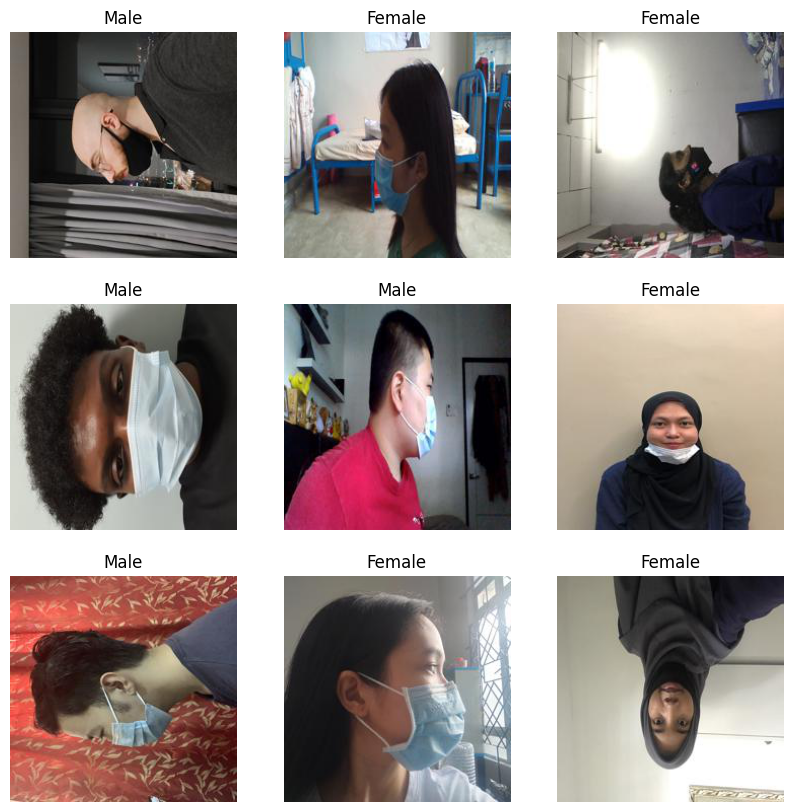

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer
base_model = tf.keras.applications.VGG16()

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                       

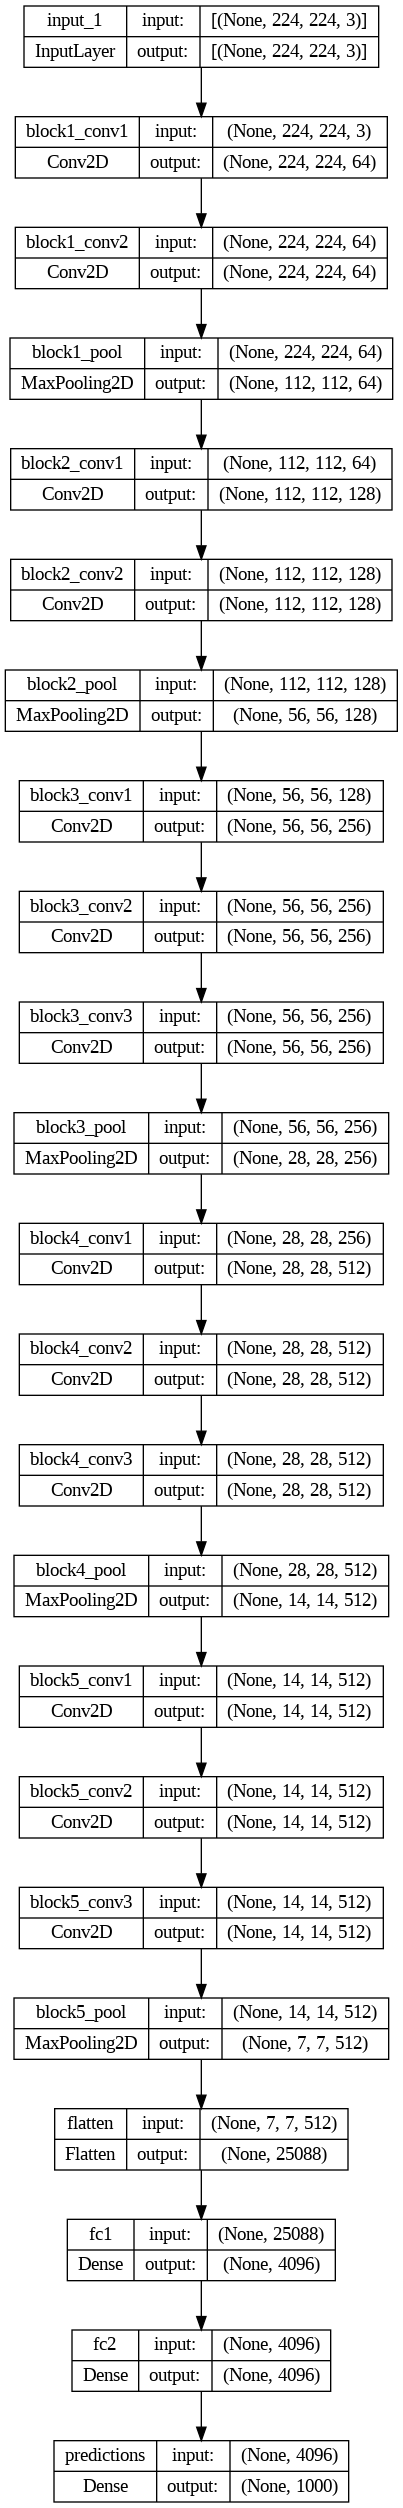

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()

****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                           

##Testing (80:20)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile
! gdown --id 1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs
To: /content/DatasetG1.zip
100% 44.5M/44.5M [00:00<00:00, 224MB/s]


In [ ]:
# Open the zip file
with ZipFile('/content/DatasetG1.zip','r') as zipObj:
  zipObj.extractall()

##load data
batch_size = 50 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

Test Split (80:20)

In [ ]:
# Define the path to the zip file
dataset_dir = '/content/DatasetG1'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.2

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_subfolder_dir, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_subfolder_dir, image)
        shutil.copyfile(src, dst)

Streaming output truncated to the last 5000 lines.
/content/DatasetG1/Male/2 day 1 (3).jpg
/content/output/train/Male/2 day 1 (3).jpg
/content/DatasetG1/Male/1623503389346.jpg
/content/output/train/Male/1623503389346.jpg
/content/DatasetG1/Male/2 day 6 (9).jpg
/content/output/train/Male/2 day 6 (9).jpg
/content/DatasetG1/Male/IMG_6760.jpeg
/content/output/train/Male/IMG_6760.jpeg
/content/DatasetG1/Male/2 day 6 (5).jpg
/content/output/train/Male/2 day 6 (5).jpg
/content/DatasetG1/Male/IMG_6414.jpeg
/content/output/train/Male/IMG_6414.jpeg
/content/DatasetG1/Male/20210612_021935.jpg
/content/output/train/Male/20210612_021935.jpg
/content/DatasetG1/Male/1623500511717.jpg
/content/output/train/Male/1623500511717.jpg
/content/DatasetG1/Male/1c735985-5b8c-4bd0-9519-0c8aa0ca3a34.jpg
/content/output/train/Male/1c735985-5b8c-4bd0-9519-0c8aa0ca3a34.jpg
/content/DatasetG1/Male/20210610_211522.jpg
/content/output/train/Male/20210610_211522.jpg
/content/DatasetG1/Male/IMG_9626.JPG
/content/output/

In [ ]:
# Define the path to the subfolder containing the images
test_Male_path = 'output/test/Male'
test_Female_path = 'output/test/Female'
train_Male_path = 'output/train/Male'
train_Female_path = 'output/train/Female'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_Male_path) if os.path.isfile(os.path.join(test_Male_path, name))])
num_images2 = len([name for name in os.listdir(test_Female_path) if os.path.isfile(os.path.join(test_Female_path, name))])
num_images3 = len([name for name in os.listdir(train_Male_path) if os.path.isfile(os.path.join(train_Male_path, name))])
num_images4 = len([name for name in os.listdir(train_Female_path) if os.path.isfile(os.path.join(train_Female_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Male: {num_images1}")
print(f"Number of images in the test/Female: {num_images2}")
print(f"Number of images in the train/Male: {num_images3}")
print(f"Number of images in the train/Female: {num_images4}")

Number of images in the test/Male: 564
Number of images in the test/Female: 565
Number of images in the train/Male: 2253
Number of images in the train/Female: 2260


In [ ]:
#  data_dir = '/content/DatasetG1'
#  train_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Male" , "Female"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 3611 images belonging to 2 classes.
Found 902 images belonging to 2 classes.
Found 1129 images belonging to 2 classes.


(50, 224, 224, 3)
(50,)


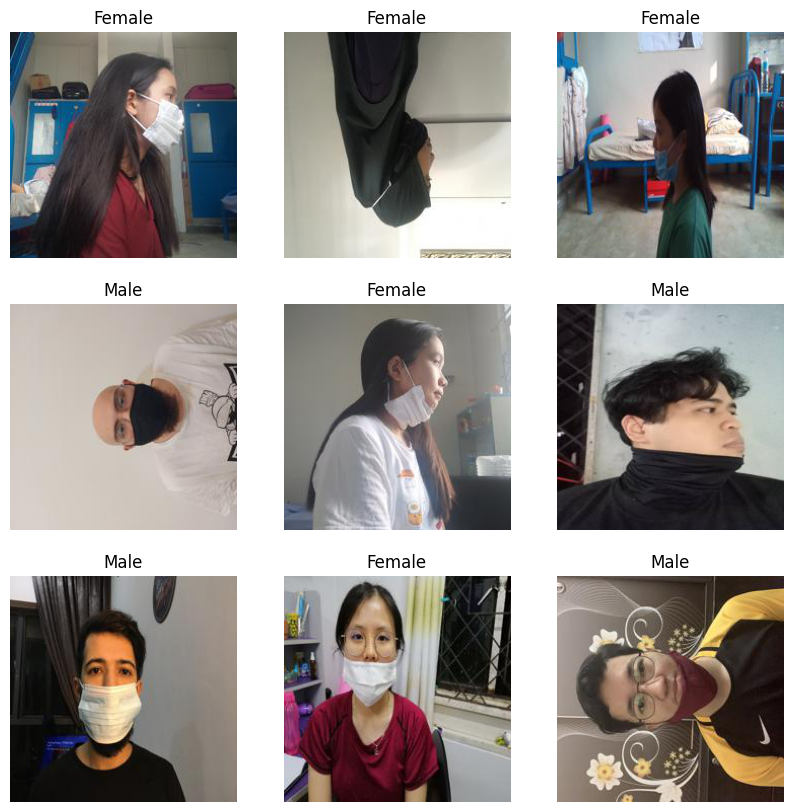

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer
base_model = tf.keras.applications.VGG16()

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

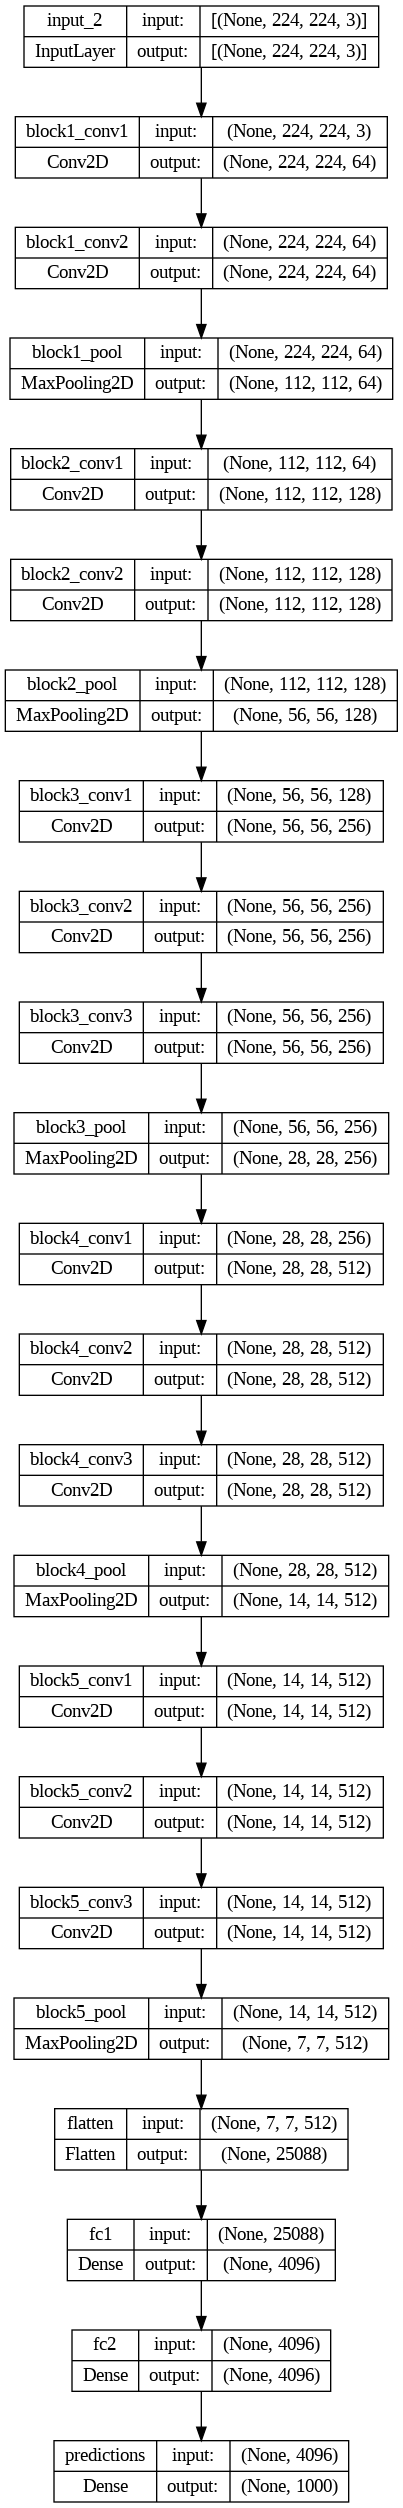

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

Without Data Argumentation

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()

****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                           

Add the last layer with new dense layer with 2 outputs replacing the dense layer with 1000 outputs

In [ ]:
#Freezing the existing weights
#for layer in model.layers:
#    layer.trainable = False
#print(model.summary())

#Freeze parameters of all layers except the last layer
for layer in model.layers[:-1]:
   layer.trainable = False

# Freeze parameters of all layers except the last and second layers
#for layer in model.layers[:-2]:
#    layer.trainable = False

# Freeze parameters of all layers except the last, second, and third layers
#for layer in model.layers[:-3]:
#    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                        

Compile Model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
73/73 [==============================] - 37s 304ms/step - loss: 2.3674 - accuracy: 0.9236 - val_loss: 1.4372 - val_accuracy: 0.8237
Epoch 2/5
73/73 [==============================] - 20s 269ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.8025 - val_accuracy: 0.8647
Epoch 3/5
73/73 [==============================] - 20s 272ms/step - loss: 2.6487e-04 - accuracy: 1.0000 - val_loss: 0.9020 - val_accuracy: 0.8470
Epoch 4/5
73/73 [==============================] - 20s 277ms/step - loss: 8.2863e-05 - accuracy: 1.0000 - val_loss: 0.9119 - val_accuracy: 0.8459
Epoch 5/5
73/73 [==============================] - 20s 278ms/step - loss: 5.0865e-05 - accuracy: 1.0000 - val_loss: 0.9263 - val_accuracy: 0.8404


Plotting the learning curve

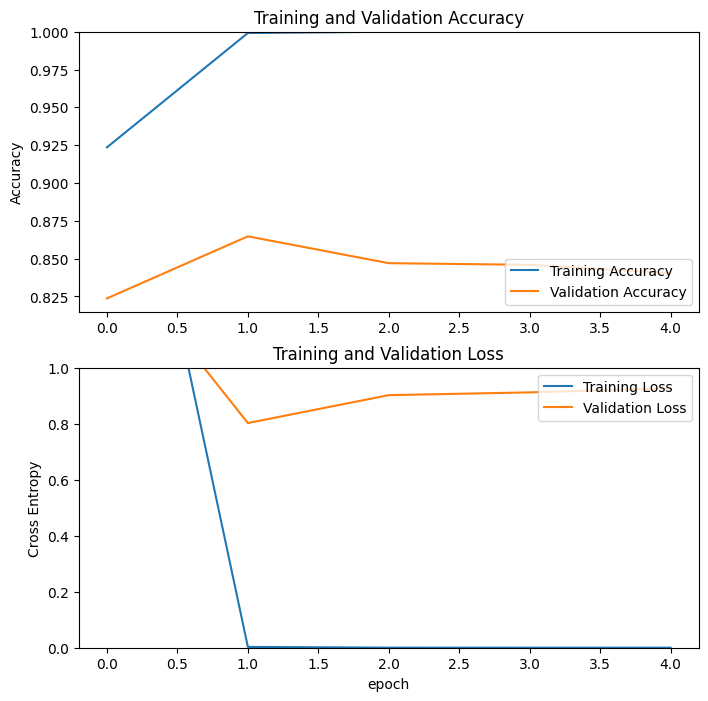

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

23/23 [==============================] - 9s 404ms/step - loss: 0.1279 - accuracy: 0.9734
Test accuracy: 0.9734278321266174


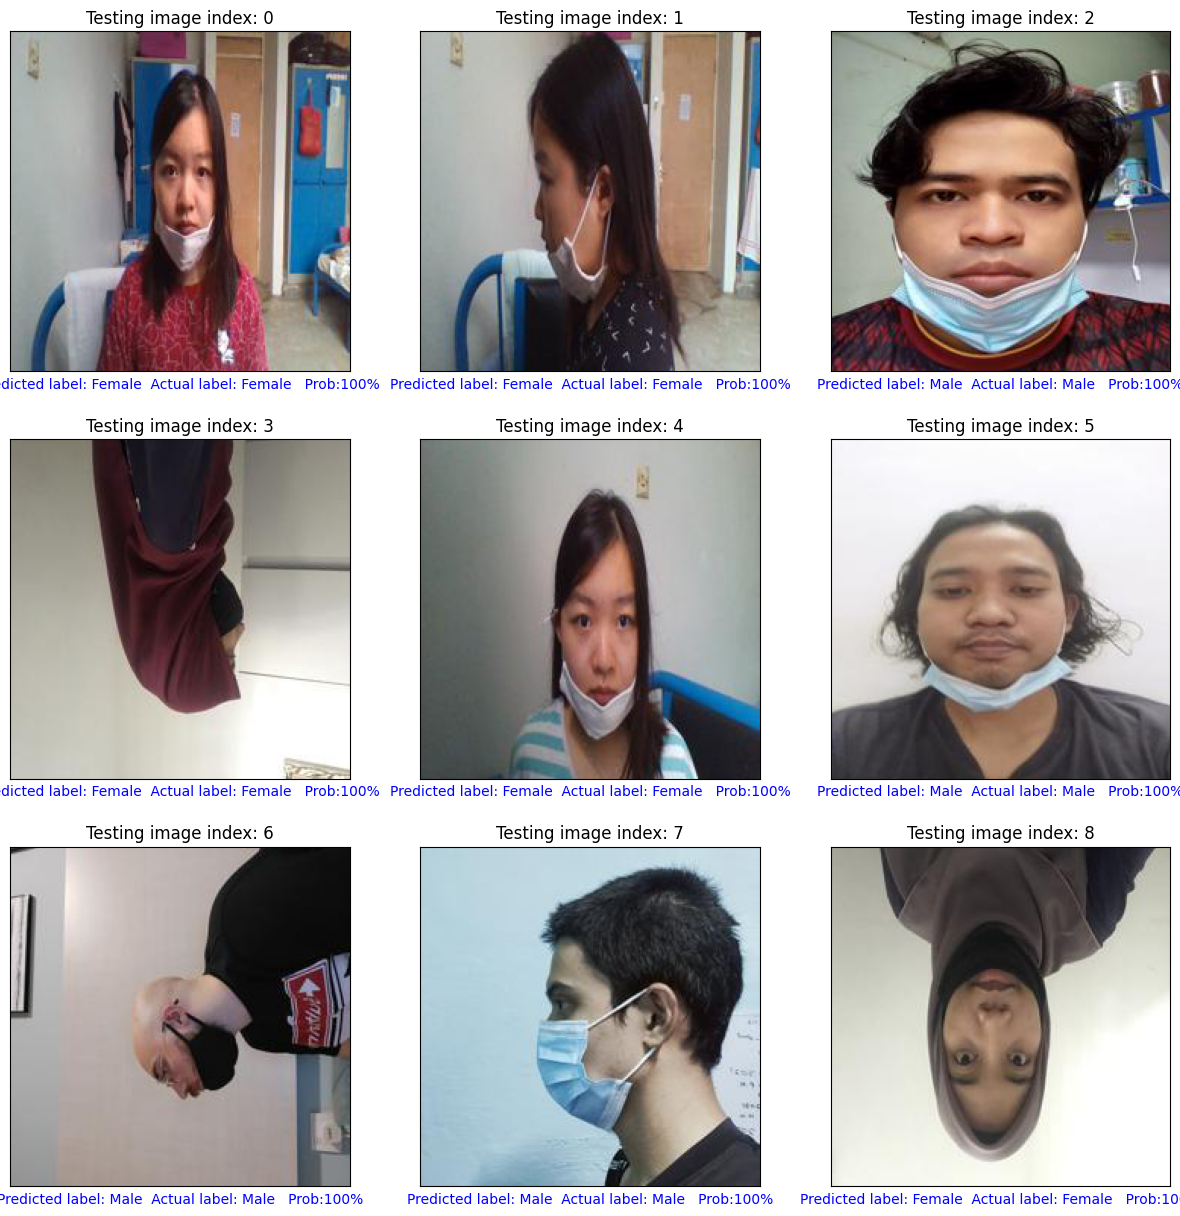

In [ ]:
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)


# test model in test image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

With data argumentation

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation options for training and validation
train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 3611 images belonging to 2 classes.


In [ ]:
# import matplotlib.pyplot as plt

# single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
# batch_images = single_train_image_batch[0]
# batch_labels = single_train_image_batch[1]
# print(batch_images.shape)
# print(batch_labels.shape)

# plt.figure(figsize=(10, 10))
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(batch_images[i].astype("uint8"))
#   plt.title(names[batch_labels[i].astype("int")])
#   plt.axis("off")

Recreate the model from VGG16

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

In [ ]:
#Freezing the existing weights
#for layer in model.layers:
#    layer.trainable = False
#print(model.summary())

#Freeze parameters of all layers except the last layer
for layer in model.layers[:-1]:
   layer.trainable = False

# Freeze parameters of all layers except the last and second layers
#for layer in model.layers[:-2]:
#    layer.trainable = False

# Freeze parameters of all layers except the last, second, and third layers
#for layer in model.layers[:-3]:
#    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                        

Compile model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
73/73 [==============================] - 51s 680ms/step - loss: 0.2606 - accuracy: 0.9366 - val_loss: 1.1679 - val_accuracy: 0.8614
Epoch 2/5
73/73 [==============================] - 50s 685ms/step - loss: 0.0485 - accuracy: 0.9839 - val_loss: 1.1050 - val_accuracy: 0.8271
Epoch 3/5
73/73 [==============================] - 57s 778ms/step - loss: 0.0637 - accuracy: 0.9864 - val_loss: 2.1021 - val_accuracy: 0.8004
Epoch 4/5
73/73 [==============================] - 50s 688ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 1.2453 - val_accuracy: 0.8326
Epoch 5/5
73/73 [==============================] - 50s 679ms/step - loss: 0.0480 - accuracy: 0.9889 - val_loss: 1.3230 - val_accuracy: 0.8282


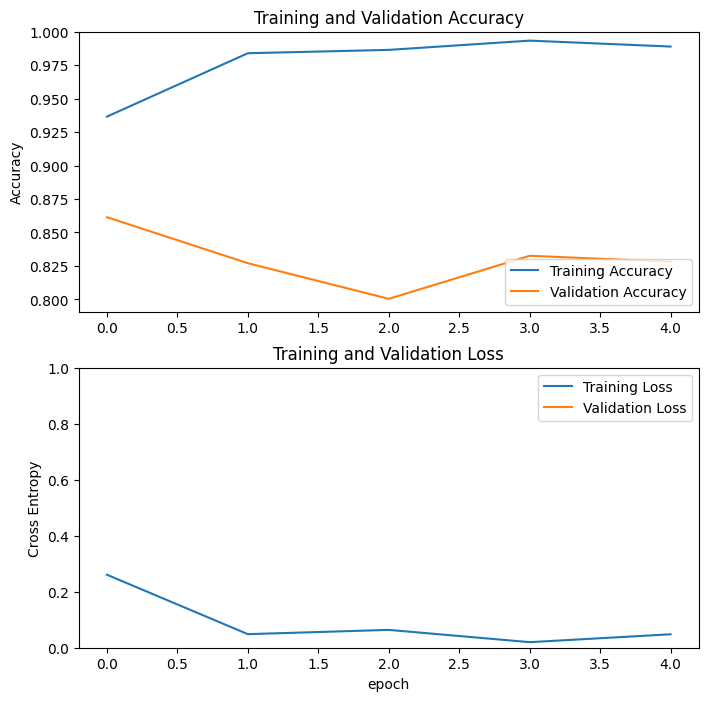

In [ ]:
## Plotting the learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
## Testing the model
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

23/23 [==============================] - 5s 219ms/step - loss: 0.1579 - accuracy: 0.9628
Test accuracy: 0.9627989530563354


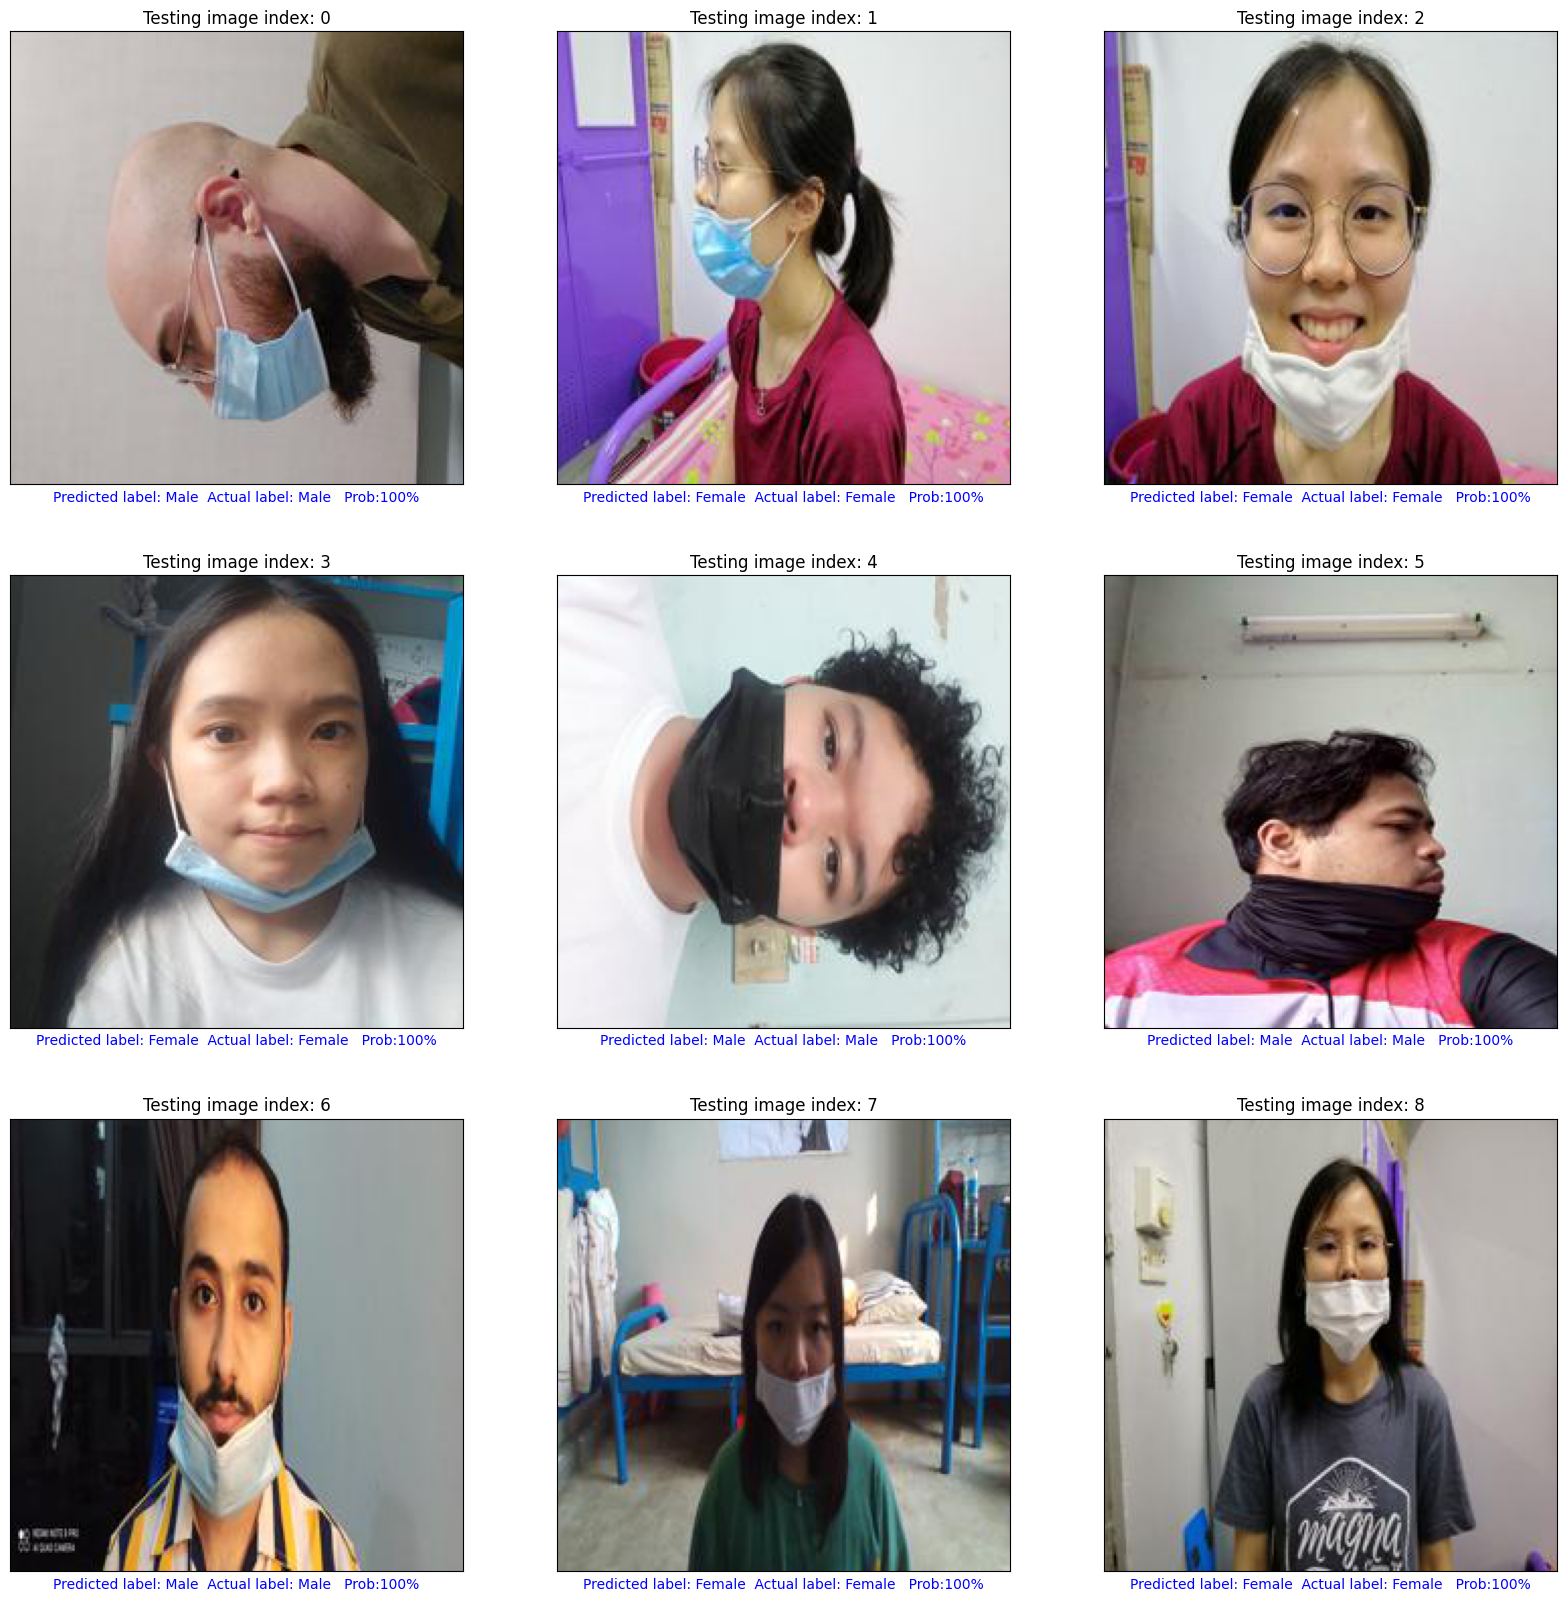

In [ ]:
## Data visualization
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(20, 20))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

# Testing (90:10)
### Set up

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


Data preprocessing

In [ ]:

! gdown --id 1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JKaEB3niXD6L0I7BmViz0ST2QZuNnKSs
To: /content/DatasetG1.zip
100% 44.5M/44.5M [00:00<00:00, 56.7MB/s]


Unzip the download file

In [ ]:
with ZipFile('/content/DatasetG1.zip','r') as zipObj:
  zipObj.extractall()

Load data using Keras utility

Create a dataset

In [ ]:
batch_size = 50 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

Data splitting (90:10)

In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG1'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/Output'

# Define the percentage of data to be used for testing
test_split = 0.1

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

Streaming output truncated to the last 5000 lines.
/content/DatasetG1/Female/11-6-21 cap 1-1.jpg
/content/Output/train/Female/11-6-21 cap 1-1.jpg
/content/DatasetG1/Female/photo6194799062834850764.jpg
/content/Output/train/Female/photo6194799062834850764.jpg
/content/DatasetG1/Female/IMG_20210606_171015.jpg
/content/Output/train/Female/IMG_20210606_171015.jpg
/content/DatasetG1/Female/11-6-21 cap 10-1.jpg
/content/Output/train/Female/11-6-21 cap 10-1.jpg
/content/DatasetG1/Female/IMG_9315.JPG
/content/Output/train/Female/IMG_9315.JPG
/content/DatasetG1/Female/4-6-21 cap 14-1.jpg
/content/Output/train/Female/4-6-21 cap 14-1.jpg
/content/DatasetG1/Female/photo6194799062834850794.jpg
/content/Output/train/Female/photo6194799062834850794.jpg
/content/DatasetG1/Female/IMG_9482.JPG
/content/Output/train/Female/IMG_9482.JPG
/content/DatasetG1/Female/IMG_0389.JPG
/content/Output/train/Female/IMG_0389.JPG
/content/DatasetG1/Female/IMG_7032.JPG
/content/Output/train/Female/IMG_7032.JPG
/content/

In [ ]:
# Define the path to the subfolder containing the images
test_male_path = '/content/Output/test/Male'
test_female_path = '/content/Output/test/Female'
train_male_path = '/content/Output/train/Male'
train_female_path = '/content/Output/train/Female'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_male_path) if os.path.isfile(os.path.join(test_male_path, name))])
num_images2 = len([name for name in os.listdir(test_female_path) if os.path.isfile(os.path.join(test_female_path, name))])
num_images3 = len([name for name in os.listdir(train_male_path) if os.path.isfile(os.path.join(train_male_path, name))])
num_images4 = len([name for name in os.listdir(train_female_path) if os.path.isfile(os.path.join(train_female_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Male: {num_images1}")
print(f"Number of images in the test/Female: {num_images2}")
print(f"Number of images in the train/Male: {num_images3}")
print(f"Number of images in the train/Female: {num_images4}")

Number of images in the test/Male: 282
Number of images in the test/Female: 283
Number of images in the train/Male: 2535
Number of images in the train/Female: 2542


create a tf.keras.preprocessing.image.ImageDataGenerator object which will handle the image dataset for training and testing.

Then the object function called flow_from_directory is used provide batch of image dataset according to specification based on function input argument.

In [ ]:
# data_dir = '/content/DatasetG1'
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Male" , "Female"] #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/Output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/Output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/Output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
        color_mode = "rgb",
    classes = names
)

Found 4062 images belonging to 2 classes.
Found 1015 images belonging to 2 classes.
Found 565 images belonging to 2 classes.


Visualise the data

(50, 224, 224, 3)
(50,)


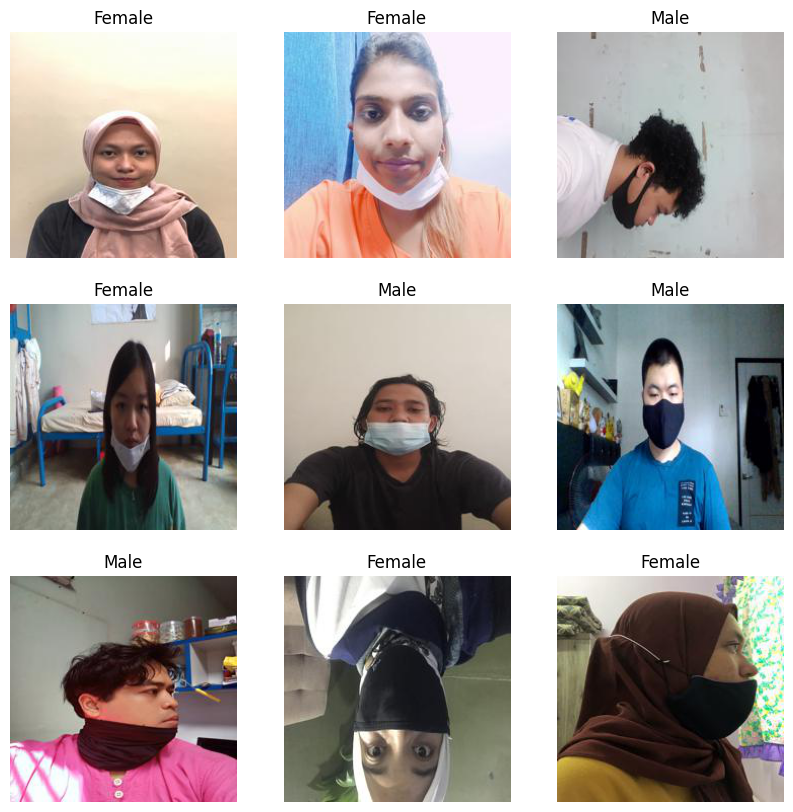

In [ ]:
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

Create the base model from the pre-trained VGG16

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

553467096/553467096 [==============================] - 16s 0us/step
****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                

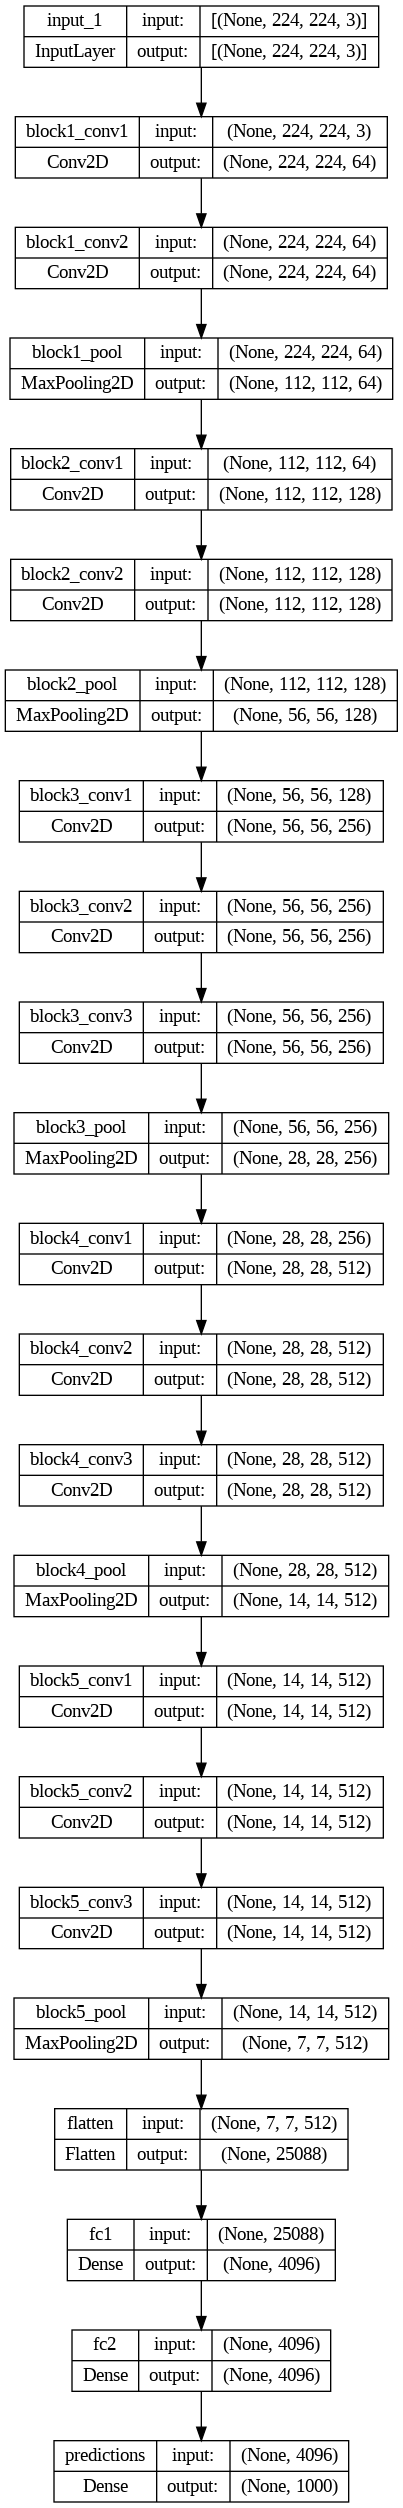

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemode.png', show_shapes = True)

**Without Augmentation**

Create new model, copy all layers in VGG16 from the 1st until 2nd last layer

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()

****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                             

Add the last layer with new dense layer with 2 outputs replacing the dense layer with 1000 outputs

In [ ]:
#Freezing the existing weights
for layer in model.layers:
    layer.trainable = False
print(model.summary())

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Compile the model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model without augmentation

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
82/82 [==============================] - 42s 328ms/step - loss: 0.1907 - accuracy: 0.9217 - val_loss: 0.7683 - val_accuracy: 0.7340
Epoch 2/5
82/82 [==============================] - 23s 280ms/step - loss: 0.0285 - accuracy: 0.9946 - val_loss: 0.7093 - val_accuracy: 0.7537
Epoch 3/5
82/82 [==============================] - 24s 295ms/step - loss: 0.0146 - accuracy: 0.9983 - val_loss: 0.7166 - val_accuracy: 0.7596
Epoch 4/5
82/82 [==============================] - 25s 302ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.7347 - val_accuracy: 0.7675
Epoch 5/5
82/82 [==============================] - 24s 293ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.7222 - val_accuracy: 0.7665


Plot the learning curves

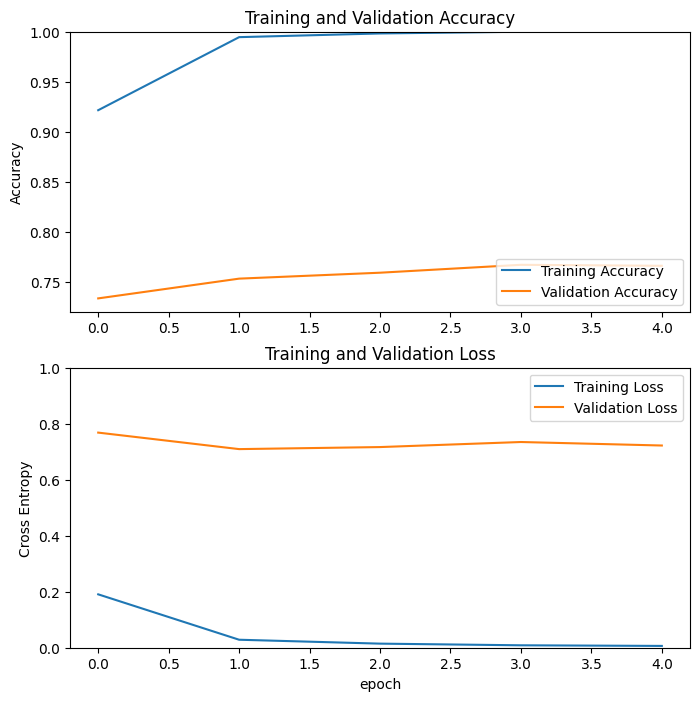

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Test the model

In [ ]:
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

12/12 [==============================] - 3s 210ms/step - loss: 0.0892 - accuracy: 0.9717
Test accuracy: 0.9716814160346985


Test the developed model in several test images and visual the image, the predicted label, actual label and the probability (in %)

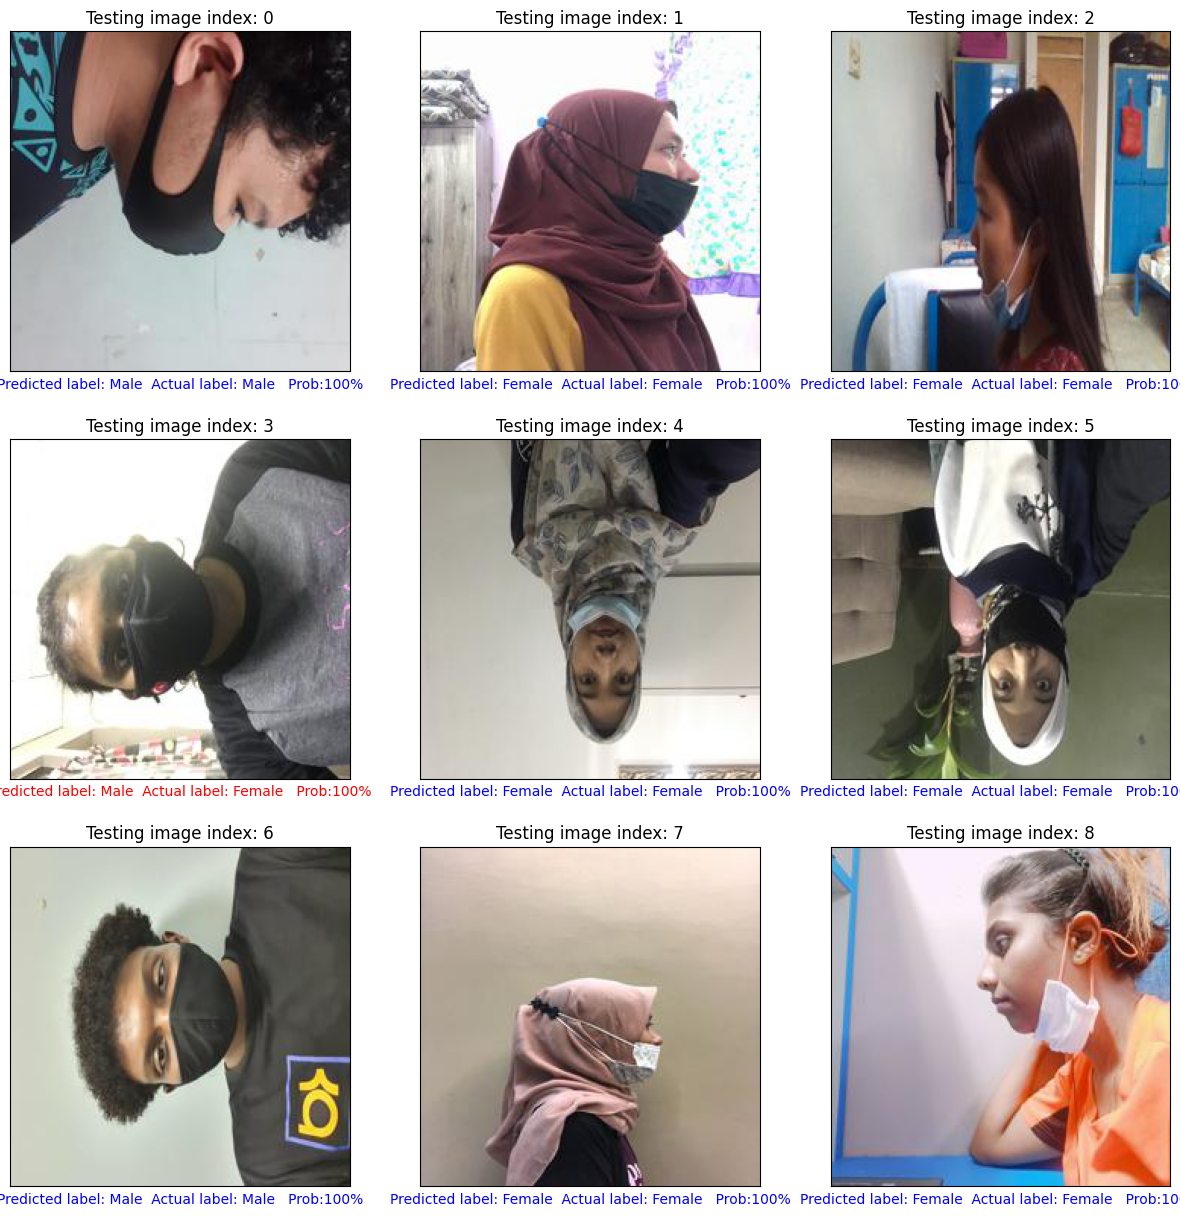

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

Train your model with image/data augmentation

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation options for training and validation
train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )

In [ ]:
# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/Output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 4062 images belonging to 2 classes.


In [ ]:
# import matplotlib.pyplot as plt

# single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
# batch_images = single_train_image_batch[0]
# batch_labels = single_train_image_batch[1]
# print(batch_images.shape)
# print(batch_labels.shape)

# plt.figure(figsize=(10, 10))
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(batch_images[i].astype("uint8"))
#   plt.title(names[batch_labels[i].astype("int")])
#   plt.axis("off")

Recreate the model from VGG16

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

Freezing parameters of all layers except last layer

Freezing the existing weights
for layer in model.layers:
    layer.trainable = False



In [ ]:
#Freezing the existing weights
for layer in model.layers[-1:]:
    layer.trainable = False

Compile the model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
82/82 [==============================] - 59s 711ms/step - loss: 1.3488 - accuracy: 0.5209 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 2/5
82/82 [==============================] - 58s 704ms/step - loss: 1.3282 - accuracy: 0.5165 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 3/5
82/82 [==============================] - 58s 708ms/step - loss: 1.3354 - accuracy: 0.5194 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 4/5
82/82 [==============================] - 59s 717ms/step - loss: 1.3471 - accuracy: 0.5185 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 5/5
82/82 [==============================] - 58s 707ms/step - loss: 1.3622 - accuracy: 0.5130 - val_loss: 1.7712 - val_accuracy: 0.5300


Freezing parameters of all layers except last and second layers

In [ ]:
#Freezing the existing weights
for layer in model.layers[-2:]:
    layer.trainable = False

Compile the model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
82/82 [==============================] - 60s 719ms/step - loss: 1.3424 - accuracy: 0.5254 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 2/5
82/82 [==============================] - 58s 712ms/step - loss: 1.3463 - accuracy: 0.5204 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 3/5
82/82 [==============================] - 57s 698ms/step - loss: 1.3394 - accuracy: 0.5170 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 4/5
82/82 [==============================] - 60s 734ms/step - loss: 1.3488 - accuracy: 0.5212 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 5/5
82/82 [==============================] - 58s 709ms/step - loss: 1.3357 - accuracy: 0.5204 - val_loss: 1.7712 - val_accuracy: 0.5300


Freezing parameters of all layers except last, second layers and third layers

In [ ]:
#Freezing the existing weights
for layer in model.layers[-3:]:
    layer.trainable = False

Compile the model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
82/82 [==============================] - 59s 713ms/step - loss: 1.3446 - accuracy: 0.5207 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 2/5
82/82 [==============================] - 58s 706ms/step - loss: 1.3387 - accuracy: 0.5224 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 3/5
82/82 [==============================] - 60s 726ms/step - loss: 1.3365 - accuracy: 0.5126 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 4/5
82/82 [==============================] - 58s 703ms/step - loss: 1.3435 - accuracy: 0.5190 - val_loss: 1.7712 - val_accuracy: 0.5300
Epoch 5/5
82/82 [==============================] - 64s 782ms/step - loss: 1.3578 - accuracy: 0.5194 - val_loss: 1.7712 - val_accuracy: 0.5300


## Chapter 3: Discussion
I : (70:30)

Without Augmentation

Without using aumentation, the training set of the data is referring to the set ratio which is 70%. The lower ratio of the training set reduces the rigidity of the model and preventing overfitting, therefore the accuracy of the model is very high during testing.


With Augmentation

By using augmentation, we are able to increased Training Data by applying various transformations, the effective training dataset can be significantly expanded, which helps prevent overfitting and improves generalization.Besides that it improves the robustness of the model. Data augmentation exposes the CNN to different variations of the input data, making it more robust to changes in lighting conditions, viewpoints, and other factors.


II : (80:20)

For the model without data augmentation, the training curve it could be observed that during training there is an increase in accuracy over the epochs which indicates the model is improving the learning in every training’s repetition. The training loss decreases over the epochs and is lower than validity loss which indicates that the model has a good accuracy with the test accuracy of 0.9495. When compared to data with argumentation, data with argumentation is more accurate than without argumentation

III : (90:10)

In the case of the 90:10 ratio, where the training set is larger and the testing dataset is smaller, the model is subjected to even fewer training examples in comparison to the 70:30 and 80:20 splits. This could potentially lead to underfitting due to a decrease in model complexity. Nevertheless, the utilisation of a reduced testing dataset can still yield valuable insights regarding the model's ability to generalise. This partition is advantageous in scenarios where the dataset is of significant size, and allocating a greater proportion for testing purposes is not deemed essential.A total of five epochs were employed in the implementation of this code. The model has undergone several iterations in order to acquire knowledge from the training data and adapt its parameters. The heightened exposure to the training data has the potential to facilitate the model's convergence towards a more optimal solution. When utilising a training dataset that consists of 90% of the available data, the overall size of the training data is increased, resulting in a greater amount of data that must be processed during each epoch. The utilisation of larger training datasets may result in an increase in the duration of training. It is anticipated that the model's performance on the training data will enhance over the course of the epochs. The model exhibits a progressive improvement in its ability to accurately fit the training data, potentially leading to an increase in training accuracy.Training a model using a 90:10 split and conducting 5 epochs offers a substantial amount of training data for the model to acquire knowledge from and adapt its parameters. The utilisation of a higher number of epochs facilitates the convergence of the model towards an improved solution.

## Chapter 4: Conclusion

In conclusion, the development of an automated classification algorithm for gender identification in individuals wearing facemasks holds immense potential for various applications. The objecives of project were achieved. The robust algorithm based on Convolutional Neural Networks (CNNs) using transfer learning were developed successfully.The algorithm were able to identify gender using automated classification algorithm. Leveraging the power of Convolutional Neural Networks (CNNs) and transfer learning with the VGG16 pre-trained model, this project were able to overcome the challenges posed by obscured facial features. By focusing on images of individuals wearing facemasks, the algorithm will differentiate between male and female subjects accurately and able to enhance the effectiveness of security systems, personalized marketing, and social media platforms. The project's outcomes able to contribute to advancements in gender identification technology, especially in scenarios where facemasks are prevalent, such as public spaces, airports, and security systems.